# Fish AI

Real time fish counter and identification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2
from darkflow.net.build import TFNet
import glob

# %config InlineBackend.figure_format = 'svg'

In [2]:
options = {
    'model': 'cfg/tiny-yolo-voc-3c.cfg',
#     'load': 'bin/tiny-yolo-voc.weights',
    'load': 1850,
    'thresh': 0.3,
    'gpu': 0
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-3c.cfg
Loading None ...
Finished in 4.458427429199219e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 2

In [3]:
# !ls test/images/fish_vid_03*.jpg

[{'label': 'saddle butterfly fish',
  'confidence': 0.50115293,
  'topleft': {'x': 916, 'y': 815},
  'bottomright': {'x': 1015, 'y': 927}},
 {'label': 'damselfish',
  'confidence': 0.72770715,
  'topleft': {'x': 38, 'y': 78},
  'bottomright': {'x': 123, 'y': 168}},
 {'label': 'damselfish',
  'confidence': 0.79773253,
  'topleft': {'x': 339, 'y': 100},
  'bottomright': {'x': 417, 'y': 196}},
 {'label': 'damselfish',
  'confidence': 0.64554816,
  'topleft': {'x': 494, 'y': 92},
  'bottomright': {'x': 578, 'y': 176}},
 {'label': 'damselfish',
  'confidence': 0.7724905,
  'topleft': {'x': 308, 'y': 186},
  'bottomright': {'x': 429, 'y': 263}},
 {'label': 'damselfish',
  'confidence': 0.5409625,
  'topleft': {'x': 188, 'y': 355},
  'bottomright': {'x': 305, 'y': 418}},
 {'label': 'damselfish',
  'confidence': 0.6205051,
  'topleft': {'x': 163, 'y': 483},
  'bottomright': {'x': 269, 'y': 581}},
 {'label': 'damselfish',
  'confidence': 0.6669638,
  'topleft': {'x': 595, 'y': 482},
  'bottomri

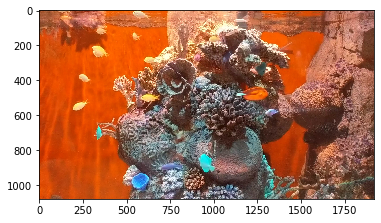

In [4]:
img = cv2.imread('test/images/fish_vid_03_0360.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)
result = tfnet.return_predict(img)
result

In [5]:
# tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
# br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
# label = result[0]['label']

# tl, br, label

In [6]:
vid_name = 'fish_vid_03_predicted'

In [7]:
n = 0
counts_list = {'damselfish':[0], 'blue tang surgeonfish':[0], 'saddle butterfly fish':[0], 'total':[0]}

for path in sorted(glob.glob('test/images/fish_vid_03*.jpg')):

    img = cv2.imread(path, cv2.IMREAD_COLOR)
    result = tfnet.return_predict(img)

    img2 = img

    counts = {'damselfish':0, 'blue tang surgeonfish':0, 'saddle butterfly fish':0, 'total':0}

    for i in range(len(result)):

        tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
        br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
        label = result[i]['label']

        counts[label] += 1

        if label == 'damselfish':
            color = (255, 255, 0) # cyan BGR
        elif label == 'blue tang surgeonfish':
            color = (255, 0, 0) # blue BGR
        elif label == 'saddle butterfly fish':
            color = (0, 255, 255) # BGR

        img2 = cv2.rectangle(img2, tl, br, color, 2)
        img2 = cv2.putText(img2, label, tl, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
                       fontScale = 0.5, color = color, thickness=2)
        
    counts['total'] = np.sum([i for i in counts.values()])

    for item in counts.keys():
        counts_list[item] += [counts[item]]

    # show the max counts
    counts_max = {k:max(v) for k, v in counts_list.items()}

    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    s = '\n'.join([key + ":  " + str(val) for key, val in counts_max.items()])
    plt.text(x=1300, y=150, s=s, fontsize=18, color='white')
    plt.imshow(img2)
    plt.tight_layout()
    plt.savefig(f'prediction/images/{vid_name+str(n).zfill(4)}.jpg')
    
    plt.clf()
    print(n)
    n += 1
#     plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [8]:
# turn to video
source = f'prediction/images/{vid_name}*.jpg'
destination = 'prediction/videos/'

img_array = []
for filename in sorted(glob.glob(source)):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(f'{destination}{vid_name}.mp4', fourcc, 15.0, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()